<a href="https://colab.research.google.com/github/sanghyun-ai/ktcloud_genai/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/107_LLM_transformers%EC%86%8C%EA%B0%9C_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **transformers 소개**

---



- 💡 **NOTE**
    - 이 노트북의 코드를 실행하려면 GPU를 사용하는 것이 좋습니다. 구글 코랩에서는 **런타임 > 런타임 유형 변경 > 하드웨어 가속기 > T4 GPU**를 선택하세요.

---

## **1.transformers란?**


- **Hugging Face가 개발한 오픈소스 라이브러리(Transformer 모델 라이브러리)**
- 자연어 처리, 컴퓨터 비전, 음성 등 다양한 분야의 최신 Transformer 기반 사전 학습된(pretrained) 모델을 쉽고 빠르게 사용할 수 있도록 지원함
- 3개의 딥러닝 라이브러리 지원 :  PyTorch, TensorFlow, Jax
- 상세설명 : https://pypi.org/project/transformers/



- **지원 플랫폼 / 요구사항**
    - Python 3.9 이상, PyTorch 2.1+, TensorFlow 2.6+, Flax 0.4.1+
- **용도 / 특징**
    - 텍스트, 이미지, 오디오, 멀티모달 모델들처럼 다양한 영역의 pretrained 모델을 간단한 API(pipeline)로 빠르게 사용 가능
- **추천 사용 케이스**
    - 빠르고 쉽게 NLP, 컴퓨터 비전, 음성 등의 사전학습 모델을 사용하거나 fine-tuning 하고자 할 때

## **2.설치 방법**

In [1]:
# 설치된 transformers 버전 확인  -->(ex: Version: 4.55.4)
!pip show transformers | grep Version

Version: 4.56.1


In [4]:
transformers --version

NameError: name 'transformers' is not defined

In [3]:
# Phi-3 모델과 호환성 때문에 transformers 4.48.3 버전을 사용합니다.
!pip install transformers==4.48.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.0
    Uninstalling tokenizers-0.22.0:
      Successfully uninstalled tokenizers-0.22.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


In [5]:
# 설치된 PyTorch 버전 확인  -->(ex: Version: 2.8.0+cu126 (+cu126-->CUDA 12.6 버전 지원))
!pip show torch | grep Version

# pip install torch==2.8.0

Version: 2.8.0+cu126


## **3.Transformers 사용 방식(3가지)**
- 💡 짧은 코드로 과제에 맞게 사전학습 모델을 다운로드 받고 사용할 수 있음
- 💡 간단 기본 코드 중심으로 설명함

#### **1.저수준 API (AutoTokenizer + AutoModel)**
- 토큰화 → 모델 호출 → **원시 벡터(last_hidden_state, pooler_output) 얻기**
- **연구/커스텀 태스크에 적합**

In [6]:
# PyTorch 버전
from transformers import AutoTokenizer, AutoModel # 얘는 파이토치 모델

# 1.토큰화
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

# 2.모델호출
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")

# 3.원시벡터 얻기
inputs = tokenizer("Hello world!", return_tensors="pt")
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 5, 768])


- **AutoTokenizer, TFAutoModel**


In [7]:
# Tensorflow 버전
from transformers import AutoTokenizer, TFAutoModel # 얘는 텐서플로우 구조 모델

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = TFAutoModel.from_pretrained("google-bert/bert-base-uncased")


inputs = tokenizer("Hello world!", return_tensors="tf")
outputs = model(**inputs)

# Hugging Face Transformers 라이브러리에서 PyTorch 모델 가중치를 TensorFlow(TF) 모델로 변환할 때 출력되는 경고문이 출력될 수 있다.
#   이 메시지는 PyTorch에서 학습된 BERT 모델의 일부 가중치(weight)가 TFBertModel 초기화 과정에서 사용되지 않았다는 뜻으로
#   본문의 경우 TFBertModel에 필요한 모든 가중치는 잘 로드되었고,
#   사용하지 않은 가중치는 단지 다른 task용 헤드일 뿐이므로,
#   추가 학습 없이 바로 예측에 사용 가능하다는 얘기

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

- **토크나이저 옵션/속성 확인 방법**
모델마다 다양한 옵션/속성을 갖고 있다.
    - **print(tokenizer)** → 주요 설정(모델 이름, vocab 크기, do_lower_case, max_len 등) 출력
    - **tokenizer.init_kwargs** → 초기화 시점의 옵션이 dict 형태로 나옴

In [8]:
# 토크나이저의 모든 속성과 설정 보기
print(tokenizer)
print('-'* 50)

# 딕셔너리 형태로 옵션 확인
print(tokenizer.init_kwargs)
print('-'* 50)

print('# 단어 집합 크기: ', tokenizer.vocab_size)               # 단어 집합 크기
print('# 입력 토큰 최대 길이: ', tokenizer.model_max_length)    # 입력 토큰 최대 길이
print('# 소문자 변환 여부: ', tokenizer.do_lower_case)          # 소문자 변환 여부
print('# [PAD] 토큰: ', tokenizer.pad_token)                    # [PAD] 토큰
print('# [CLS] 토큰: ', tokenizer.cls_token)                    # [CLS] 토큰
print('# [SEP] 토큰: ', tokenizer.sep_token)                    # [SEP] 토큰


BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)
--------------------------------------------------
{'do_lower_case': True, 'unk_token': '[UNK]', 'sep_token': '[SE

#### **2.중간 수준 API (Task-specific Models)**
- **AutoModelForXXX → 태스크별 학습/추론용**
- AutoModelForSequenceClassification, AutoModelForQuestionAnswering 등 태스크 맞춤 헤드가 붙은 모델 사용
- 장점: 파인튜닝/태스크 전용 학습에 적합
- 단점: 태스크별 클래스 필요

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### **3.고수준 API (pipeline)**
- **pipeline → 빠른 프로토타이핑, 데모용**
- 토크나이저+모델+후처리를 한 번에 묶어 제공
- 감정분석, 번역, 요약, QA 등 바로 사용 가능

In [10]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis")
print(nlp("I love this course!"))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998835325241089}]


## **4.예제로 QuickTour**

### **예제: 감정분석**

In [11]:
# 감정 분석 파이프라인
from transformers import pipeline

classifier = pipeline('sentiment-analysis')
print(classifier('We are very happy to introduce pipeline to the transformers repository.'))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9996980428695679}]


In [12]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis")
print(nlp("이 강의는 정말 재미있어요!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9887384176254272}]


### **예제: 이미지 객체 감지**

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


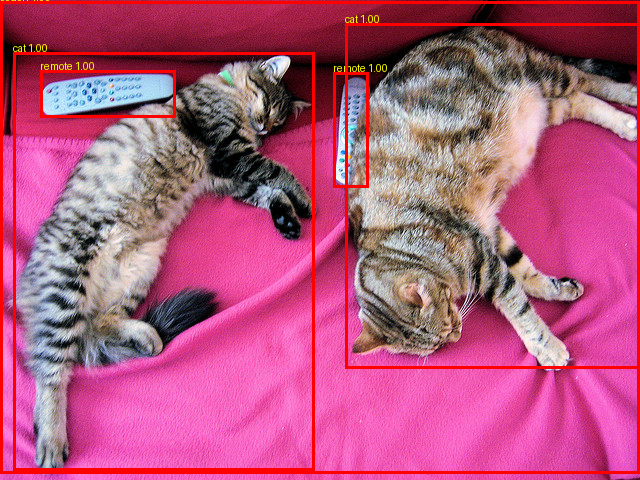

In [13]:
import requests
from PIL import Image, ImageDraw
from transformers import pipeline

# 이미지 다운로드
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/coco_sample.png"
image_data = requests.get(url, stream=True).raw
image = Image.open(image_data)

# 객체 감지 파이프라인
object_detector = pipeline("object-detection")
results = object_detector(image)

# 원본 이미지에 바운딩 박스 그리기
draw = ImageDraw.Draw(image)

for result in results:
    box = result["box"]
    label = result["label"]
    score = result["score"]

    # 박스 좌표
    x1, y1, x2, y2 = box["xmin"], box["ymin"], box["xmax"], box["ymax"]

    # 박스 그리기
    draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=3)
    # 레이블 + 점수 표시
    draw.text((x1, y1 - 10), f"{label} {score:.2f}", fill="yellow")

# 결과 출력 (Colab 환경에서 시각화)
image.show()   # 로컬 환경이면 새 창
display(image) # Colab/Jupyter 환경이면 노트북 안에 표시


##  **5.huggingface Access Token 적용 유무**

#### **Access Token 없이 공개 모델 다운로드**

In [14]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello world", return_tensors="pt")
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([1, 4, 768])


In [15]:
from transformers import TFBertModel

# PyTorch 체크포인트에서 불러오기
model = TFBertModel.from_pretrained("bert-base-uncased", from_pt=True)

# 정상 동작 (경고는 나올 수 있음)
outputs = model(**tokenizer("Hello world", return_tensors="tf"))
print(outputs.last_hidden_state.shape)


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

(1, 4, 768)


 #### **Access Token 넣고 비공개 모델 접근**
- https://huggingface.co/settings/tokens  로그인 후 사용하고자 하는 모델에 대한 access용 토큰 발급

In [20]:
# 1단계: Hugging Face 토큰 생성 및 설정
from huggingface_hub import login
import os

# Google Colab에서 토큰 입력 (한 번만 실행)
# https://huggingface.co/settings/tokens 에서 토큰 생성 후 입력
login()

# 또는 직접 토큰 입력 (보안상 권장하지 않음)
os.environ["HUGGINGFACE_HUB_TOKEN"] = "LLM_TOKEN"

In [17]:
# from huggingface_hub import login
# login("hf_xxxxxxxxxxxxx")

# from transformers import AutoModel
# model = AutoModel.from_pretrained("username/private-model")




---



## **6.BERT 모델로 기본 코드 상세 설명**
- 💡 Transformers 라이브러리 기본 사용법 - BERT 모델 예제



1. 토크나이저의 주요 기능:
    - 텍스트를 토큰으로 분할 (서브워드 토큰화)
    - 토큰을 숫자 ID로 변환
    - 특수 토큰 추가 ([CLS], [SEP], [PAD] 등)
    - 어텐션 마스크 생성
2. 모델의 주요 구성요소:
    - Embedding Layer: 토큰 ID를 벡터로 변환
    - Transformer Layers: 12개의 인코더 층
    - Pooler: [CLS] 토큰의 표현을 가공 (분류 작업용)
3. 입력 텍스트 토큰화 단계별 과정:
    - 텍스트 정규화: "Hello world!" → "hello world!"
    - 서브워드 토큰화: ["hello", "world", "!"]
    - 특수 토큰 추가: ["[CLS]", "hello", "world", "!", "[SEP]"]
    - ID 변환: [101, 7592, 2088, 999, 102] (예시)
    - 텐서 생성 및 패딩/마스킹
4. 모델 추론(BERT 모델 내부 처리 과정):
    - Embedding: 토큰 ID → 768차원 벡터
    - Position Encoding: 위치 정보 추가
    - 12개 Transformer Layer 통과:
        - Multi-Head Self-Attention
        - Feed-Forward Network
        - Layer Normalization
        - Residual Connection
    - 최종 hidden state 생성

#### 기본 코드 상세 : 저수준 API (AutoTokenizer + AutoModel)

In [18]:
# =====================================================
# Transformers 라이브러리 기본 사용법 - BERT 모델 예제
# =====================================================

# 필요한 라이브러리 import
from transformers import AutoTokenizer, AutoModel
# AutoTokenizer: 자동으로 적절한 토크나이저를 로드하는 클래스
# AutoModel: 자동으로 적절한 모델 아키텍처를 로드하는 클래스

# =====================================================
# 1. 토크나이저 초기화
# =====================================================
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
"""
토크나이저 초기화 상세 설명:
- from_pretrained(): Hugging Face Hub에서 사전 훈련된 토크나이저를 다운로드
- "google-bert/bert-base-uncased": 모델 식별자
  * google-bert: Google에서 개발한 BERT 모델
  * bert-base: 기본 크기 모델 (12층, 768 hidden size)
  * uncased: 대소문자를 구분하지 않음 (모든 텍스트를 소문자로 변환)
"""

# =====================================================
# 2. 모델 초기화
# =====================================================
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")
"""
모델 초기화 상세 설명:
- 같은 모델 식별자를 사용하여 토크나이저와 모델의 일치성 보장
- BERT-base 모델 구조:
  * 12개의 Transformer 인코더 층
  * 768차원 히든 스테이트
  * 12개의 어텐션 헤드
  * 30,522개의 어휘 크기
  * 약 110M개의 파라미터
"""

# =====================================================
# 3. 입력 텍스트 토큰화
# =====================================================
inputs = tokenizer("Hello world!", return_tensors="pt")
"""
토큰화 과정 상세 설명:
- 입력: "Hello world!" (일반 텍스트 문자열)
- return_tensors="pt": PyTorch 텐서 형태로 반환 지정

텍스트 정규화: "Hello world!" → "hello world!"
- 서브워드 토큰화: ["hello", "world", "!"]
- 특수 토큰 추가: ["[CLS]", "hello", "world", "!", "[SEP]"]
- ID 변환: [101, 7592, 2088, 999, 102] (예시)
- 텐서 생성 및 패딩/마스킹

반환되는 딕셔너리 구조:
- input_ids: 토큰 ID 시퀀스 [1, 5]
- token_type_ids: 문장 구분자 (단일 문장이므로 모두 0) [1, 5]
- attention_mask: 실제 토큰 위치 표시 (모두 1) [1, 5]
"""

# =====================================================
# 4. 모델 추론 실행
# =====================================================
outputs = model(**inputs)
"""
모델 추론 상세 설명:
- **inputs: 딕셔너리를 키워드 인자로 전달
- model()은 forward() 메서드를 호출

BERT 모델 내부 처리 과정:
1. Embedding: 토큰 ID → 768차원 벡터
2. Position Encoding: 위치 정보 추가
3. 12개 Transformer Layer 통과:
   - Multi-Head Self-Attention
   - Feed-Forward Network
   - Layer Normalization
   - Residual Connection
4. 최종 hidden state 생성

반환되는 객체 (BaseModelOutputWithPoolingAndCrossAttentions):
- last_hidden_state: 마지막 층의 모든 토큰 표현 [batch_size, seq_len, hidden_size]
- pooler_output: [CLS] 토큰의 풀링된 표현 [batch_size, hidden_size]
- hidden_states: 모든 층의 hidden state (output_hidden_states=True일 때)
- attentions: 어텐션 가중치 (output_attentions=True일 때)
"""

# =====================================================
# 5. 출력 결과 확인
# =====================================================
print(outputs.last_hidden_state.shape)
"""
출력 결과 분석:
- 예상 결과: torch.Size([1, 5, 768])
  * 1: 배치 크기 (단일 문장)
  * 5: 시퀀스 길이 (토큰 개수)
    - [CLS] + hello + world + ! + [SEP] = 5개
  * 768: BERT-base의 히든 차원

각 차원의 의미:
- 첫 번째 차원 (1): 배치에서 처리된 문장 수
- 두 번째 차원 (5): 각 토큰의 위치
- 세 번째 차원 (768): 각 토큰의 768차원 벡터 표현

토큰별 표현 접근:
- outputs.last_hidden_state[0, 0, :]: [CLS] 토큰 표현
- outputs.last_hidden_state[0, 1, :]: "hello" 토큰 표현
- outputs.last_hidden_state[0, 2, :]: "world" 토큰 표현
- outputs.last_hidden_state[0, 3, :]: "!" 토큰 표현
- outputs.last_hidden_state[0, 4, :]: [SEP] 토큰 표현
"""
print()

torch.Size([1, 5, 768])



#### 기본 코드 활용 예제

In [ ]:
# =====================================================
# 추가 활용 예제
# =====================================================
from typing import List, Tuple
import torch        # tensor와 그래디언트 제어를 위해 사용
from transformers import AutoTokenizer, AutoModel, BatchEncoding

# ===== 환경/리소스 설정 =====
DEVICE = (
    "cuda" if torch.cuda.is_available()
    else ("mps" if getattr(torch.backends, "mps", None) and torch.backends.mps.is_available() else "cpu")
)

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModel.from_pretrained("google-bert/bert-base-uncased").to(DEVICE).eval()


# ===== 1) 토큰화 분석 =====
def analyze_tokenization(text: str, tokenizer: AutoTokenizer) -> None:
    """
    단일 텍스트를 한 번의 인코딩으로 분석(특수 토큰/ids/토큰/복원 텍스트).
    """
    enc: BatchEncoding = tokenizer(
        text,
        add_special_tokens=True,
        return_tensors=None,
        return_attention_mask=False,
        return_offsets_mapping=False
    )

    input_ids = enc["input_ids"]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    decoded = tokenizer.decode(input_ids, skip_special_tokens=False)

    print(f"원본 텍스트 : {text}")
    print(f"토큰들      : {tokens}")
    print(f"토큰 ID들   : {input_ids}")
    print(f"디코딩 결과 : {decoded}")


# ===== 2) 표현 추출(Mean/Max/CLS) =====
def extract_representations(
    outputs: BaseException,  # 실제 타입은 ModelOutput이지만, 런타임 제네릭 회피
    attention_mask: torch.Tensor
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    모델 출력에서 (CLS, mean-pool, max-pool) 반환.
    - CLS: 각 배치의 첫 토큰 임베딩
    - Mean: attention_mask를 반영해 PAD 제외 평균
    - Max: 시퀀스 차원 최대값
    반환 shape: (B, H), (B, H), (B, H)
    """
    last_hidden = outputs.last_hidden_state  # (B, L, H)
    # B (Batch size) : 한 번에 처리하는 문장(또는 입력 샘플)의 개수
    # L (Sequence length) : 각 입력 문장의 토큰 개수 (패딩 포함)
    # H (Hidden size / Hidden dimension) : 각 토큰을 벡터로 표현한 차원 수, bert-base-uncased의 경우 H = 768, bert-large는 H = 1024

    # CLS
    cls_repr = last_hidden[:, 0, :]  # (B, H)

    # Mean pooling (PAD 제외). mask -> (B, L, 1), 가중 합/합계
    mask = attention_mask.unsqueeze(-1).type_as(last_hidden)  # (B, L, 1)
    summed = (last_hidden * mask).sum(dim=1)                   # (B, H)
    counts = mask.sum(dim=1).clamp(min=1e-9)                  # (B, 1) zero-division 방지
    mean_repr = summed / counts                               # (B, H)

    # Max pooling (PAD는 -inf로 채워서 무시)
    masked_hidden = last_hidden.masked_fill(mask == 0, float("-inf"))
    max_repr = masked_hidden.max(dim=1).values                # (B, H)

    return cls_repr, mean_repr, max_repr

# ===== 3) 배치 처리 =====
def batch_processing(
    texts: List[str],
    tokenizer: AutoTokenizer,
    model: AutoModel,
    max_length: int = 512
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    여러 텍스트를 배치로 처리하고 (CLS/Mean/Max) 임베딩을 반환.
    """
    enc: BatchEncoding = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt",
        return_attention_mask=True
    )


    # 디바이스 이동
    enc = {k: v.to(DEVICE) for k, v in enc.items()}
    print(enc)

    with torch.inference_mode():
        outputs = model(**enc)

    cls_repr, mean_repr, max_repr = extract_representations(outputs, enc["attention_mask"])
    return cls_repr, mean_repr, max_repr


# ===== 사용 예시 =====
if __name__ == "__main__":
    print(f"[INFO] Using device: {DEVICE}")

    # 1) 토큰 정보 자세히 보기
    analyze_tokenization("Hello world!", tokenizer)
    print("-" * 50)

    # 2) 배치 처리 + 표현 추출
    sample_texts = [
        "Hello world!",
        "How are you today?",
        "This is a longer sentence for demonstration."
    ]
    cls_vec, mean_vec, max_vec = batch_processing(sample_texts, tokenizer, model)

    print(f"CLS 표현     : {cls_vec.shape}")   # (B, 768)
    print(f"Mean 풀링    : {mean_vec.shape}")  # (B, 768)
    print(f"Max  풀링    : {max_vec.shape}")   # (B, 768)
    print('-' * 50)


### **특수 토큰 설명** : BERT [CLS], [SEP]



####  **BERT 소개**

- **BERT**(Bidirectional Encoder Representations from Transformers)
    - 구글(2018)**에서 발표한 사전학습(pre-trained) 언어모델
    - 양방향(Bidirectional) Transformer 인코더 구조를 사용 → 문맥을 앞뒤 모두 반영
    - 사전학습(Pre-training) 두 가지 방식
        - Masked Language Modeling (MLM): 문장 속 단어를 [MASK]로 가리고 예측
        - Next Sentence Prediction (NSP): 두 문장이 연속되는지 여부 예측
    - 학습 후 다양한 NLP 태스크(분류, 개체명 인식, 질의응답 등)에 파인튜닝(fine-tuning) 가능
    - BERT는 구조적으로 두 개의 문장(A, B)까지만 명시적으로 입력(구분) 가능함 -->(세그먼트 ID는 0과 1만 지원 가능)
        - 문장이 3개 이상일 경우: 보통 하나의 긴 시퀀스로 합치고 [SEP] 토큰으로 분리함
    - 성능 혁신-->다른 파생 모델 등장
        - RoBERTa: NSP 제거, 문장 구분을 다르게 처리
        - Longformer, BigBird: 긴 문장/문서 처리
        - ALBERT: Sentence Order Prediction (SOP) 사용
- [참고] **GPT** : Transformer의 Decoder 블록만 사용하는 구조
    - 단방향 (왼쪽 → 오른쪽만 봄), 오른쪽(과거) 문맥만 보고 다음 단어를 예측하는 자기회귀(auto-regressive) 언어모델
    - 즉, GPT는 문장을 입력받으면:
        1. 문장을 토큰화 (예: "Hello world" → [Hello, world])
        2. 각 토큰을 임베딩 + 위치 임베딩
        3. Causal Masked Self-Attention 사용
            - 현재 단어를 예측할 때 앞쪽 단어만 참조 가능
            - 예: "The cat sat on the" → 다음 단어 mat 예측





####  **[CLS] 토큰**
- **[CLS] 토큰의 역할과 특징**
    1. 위치: 항상 입력 시퀀스의 맨 앞에 위치
    2. 목적: 전체 문장의 집약된 표현(aggregate representation) 생성
    3. 활용: 문장 수준의 분류 작업 (감정 분석, 문서 분류 등)에 주로 사용
    4. 학습: NSP(Next Sentence Prediction) 과제를 통해 문장 간 관계 학습
    - **[CLS] 토큰의 임베딩은 문장 전체의 의미를 압축한 768차원 벡터**입니다.

#### **[SEP] 토큰**

- **[SEP] 토큰의 역할과 특징**
    1. 위치: 각 문장의 끝에 위치
    2. 목적: 문장 간 경계를 명확히 구분
    3. 활용:
        - 단일 문장: 문장 끝을 표시
        - 문장 쌍: 두 문장을 구분 (질의응답, 문장 관계 분석)
    4. 토큰 타입 ID: [SEP] 토큰을 기준으로 문장 구분 (0, 1로 표시)
    - **[SEP] 토큰은 BERT가 문장의 구조를 이해하는 데 핵심적인 역할**을 합니다.

#### **[CLS], [SEP] 토큰 확인**
- [참고] Claude 아티팩트 : https://claude.ai/public/artifacts/8b6bd242-86a5-48e9-b7dd-457dba23781d

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# 토크나이저와 모델 로드
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")


# 감정 분석용 예제 문장들
sentences = [
    "I love this product! It's amazing!",           # 매우 긍정
    "This is okay, nothing special.",               # 중립
    "I hate this. Worst purchase ever.",           # 매우 부정
    "The service was good but could be better.",   # 약간 긍정
    "Today is a beautiful day! 😊",                # 이모지 포함 긍정
    "I'm not sure how I feel about this...",       # 애매한 감정
]

# =====================================================
# 1. [CLS] 토큰 (Classification Token)
# =====================================================
def demonstrate_cls_token():

    cls_embeddings = []

    for i, sentence in enumerate(sentences):
        # 토큰화 및 모델 추론
        inputs = tokenizer(sentence, return_tensors="pt")

        with torch.no_grad():
            outputs = model(**inputs)

        # [CLS] 토큰의 임베딩 추출 (인덱스 0)
        cls_embedding = outputs.last_hidden_state[0, 0, :]  # [배치, 위치, 차원]
        cls_embeddings.append(cls_embedding)

        print()
        print(f"문장 {i+1}: {sentence}")
        print(f"[CLS] 임베딩 형태: {cls_embedding.shape}")
        print(f"[CLS] 임베딩 일부: {cls_embedding[:5].tolist()}")  # 처음 5개 값만 출력
        print("-" * 50)

    # [CLS] 토큰 간 유사도 계산 (코사인 유사도)
    print("\n=== [CLS] 토큰 간 유사도 분석 ===")
    for i in range(len(cls_embeddings)):
        for j in range(i+1, len(cls_embeddings)):
            similarity = F.cosine_similarity(
                cls_embeddings[i].unsqueeze(0),
                cls_embeddings[j].unsqueeze(0)
            )
            print(f"문장 {i+1} vs 문장 {j+1}: {similarity.item():.4f}")

# =====================================================
# 2. [SEP] 토큰 (Separator Token)
# =====================================================
def demonstrate_sep_token():

    # 1.단일 문장 예제
    single_sentence = "BERT is a powerful language model."
    inputs_single = tokenizer(single_sentence, return_tensors="pt")

    print("1. 단일 문장에서의 [SEP] 토큰:")
    print(f"원본 문장: {single_sentence}")
    tokens = tokenizer.convert_ids_to_tokens(inputs_single.input_ids[0])
    print(f"토큰들: {tokens}")
    print(f"토큰 타입 ID: {inputs_single.token_type_ids[0].tolist()}")
    print("-" * 50)
    print()


    # 2.문장 쌍 예제 (질의응답 형태)
    question = "What is BERT?"
    answer = "BERT is a bidirectional encoder representation from transformers."

    # 문장 쌍 토큰화
    inputs_pair = tokenizer(question, answer, return_tensors="pt")

    print("2. 문장 쌍에서의 [SEP] 토큰:")
    print(f"질문: {question}")
    print(f"답변: {answer}")
    tokens_pair = tokenizer.convert_ids_to_tokens(inputs_pair.input_ids[0])
    print(f"토큰들: {tokens_pair}")
    print(f"토큰 타입 ID: {inputs_pair.token_type_ids[0].tolist()}")
    print("-" * 50)
    print()


    # [SEP] 토큰 위치 찾기
    sep_token_id = tokenizer.sep_token_id
    sep_positions = (inputs_pair.input_ids[0] == sep_token_id).nonzero().flatten()
    print(f"[SEP] 토큰 ID: {sep_token_id}")
    print(f"[SEP] 토큰 위치: {sep_positions.tolist()}")


# =====================================================
# 3. 특수 토큰 활용 패턴 비교
# =====================================================
def compare_token_patterns():
    """다양한 입력 패턴에서 특수 토큰 사용 비교"""

    print("\n=== 특수 토큰 사용 패턴 비교 ===")

    examples = [
        # 케이스 1: 단일 짧은 문장
        ("Hello world!", "단일 짧은 문장"),

        # 케이스 2: 단일 긴 문장
        ("Natural language processing is a fascinating field that combines linguistics and computer science.", "단일 긴 문장"),

        # 케이스 3: 문장 쌍
        (("Is this a good movie?", "Yes, it's excellent!"), "문장 쌍"),
    ]

    for example, description in examples:
        print(f"\n--- {description} ---")

        if isinstance(example, tuple):  # 문장 쌍
            inputs = tokenizer(example[0], example[1], return_tensors="pt")
            print(f"문장 1: {example[0]}")
            print(f"문장 2: {example[1]}")
        else:  # 단일 문장
            inputs = tokenizer(example, return_tensors="pt")
            print(f"문장: {example}")

        # 토큰 분석
        tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])
        token_types = inputs.token_type_ids[0].tolist()

        print(f"토큰 개수: {len(tokens)}")
        print(f"토큰들: {tokens}")
        print(f"토큰 타입: {token_types}")

        # 특수 토큰 위치 확인
        cls_pos = tokens.index('[CLS]') if '[CLS]' in tokens else -1
        sep_positions = [i for i, token in enumerate(tokens) if token == '[SEP]']

        print(f"[CLS] 위치: {cls_pos}")
        print(f"[SEP] 위치: {sep_positions}")

def print_token_id():
    # 실제 토큰 ID 값 확인
    print(f"\n=== 토큰 ID 값 === ")
    print(f"   [CLS] 토큰 ID: {tokenizer.cls_token_id}")
    print(f"   [SEP] 토큰 ID: {tokenizer.sep_token_id}")
    print(f"   [PAD] 토큰 ID: {tokenizer.pad_token_id}")
    print(f"   [UNK] 토큰 ID: {tokenizer.unk_token_id}")


# =====================================================
# 실행
# =====================================================

demonstrate_cls_token()     # [CLS] 토큰의 역할과 특징
demonstrate_sep_token()     # [SEP] 토큰의 역할과 특징
compare_token_patterns()    # 특수 토큰 활용 패턴 비교

- **=== 특수 토큰 사용 주의사항 ===**
    1. [CLS] 토큰 주의사항:
        - 항상 시퀀스의 첫 번째 위치(인덱스 0)에 위치
        - 문장 수준 작업에만 사용 (토큰 수준 작업에는 부적합)
        - 파인튜닝시 [CLS] 토큰에 분류 헤드 연결
    2. [SEP] 토큰 주의사항:
        - 문장 쌍 처리시 반드시 필요
        - 토큰 타입 ID와 함께 문장 구분에 사용
        - 최대 시퀀스 길이 계산시 [SEP] 토큰도 포함하여 계산
    3. 일반적인 실수들:
        - [CLS] 토큰을 토큰 수준 분류에 사용
        - 문장 쌍에서 [SEP] 토큰 누락
        - 토큰 타입 ID 무시

## **7.사전 학습된 모델 사용**

**=== 사전 훈련 모델 vs 랜덤 분류기 비교 ===**
- ✅ 사전 훈련된 모델의 장점:
    - • 실제 감정 분석 데이터셋으로 훈련되어 높은 정확도
    - • 다양한 표현과 문맥을 이해
    - • 이모지, 속어, 은유적 표현도 처리 가능
    - • 신뢰할 수 있는 확률 분포 제공

- ❌ 랜덤 가중치 분류기의 한계:
    - • 무작위 예측으로 정확도 약 33% (3클래스 기준)
    - • 문맥을 전혀 이해하지 못함
    - • 일관성 없는 결과


- **📚 핵심 학습 포인트**:
   1. [CLS] 토큰은 문장 전체의 표현을 담고 있습니다
   2. 실제 감정 분석은 사전 훈련된 모델을 사용해야 정확합니다
   3. 랜덤 가중치로는 의미있는 분류가 불가능합니다

- [참고] Claude 아티팩트 : https://claude.ai/public/artifacts/f019b7d3-01de-467e-a01d-00ca8bf4fdb4

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# 토크나이저와 모델 로드
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")


# 감정 분석용 예제 문장들
sentences = [
    "I love this product! It's amazing!",           # 매우 긍정
    "This is okay, nothing special.",               # 중립
    "I hate this. Worst purchase ever.",           # 매우 부정
    "The service was good but could be better.",   # 약간 긍정
]

# =====================================================
# 방법 1: 랜덤 가중치 분류기 (교육용)
# =====================================================
def sentiment_analysis_with_cls():
    """[CLS] 토큰을 활용한 간단한 감정 분석 예제"""

    print("\n=== 랜덤 가중치 분류기(토큰 활용 감정 분석) ===")

    cls_embeddings = []

    # 간단한 감정 분류를 위한 선형 분류기 (3개 클래스: 부정, 중립, 긍정)
    # 실제로는 훈련된 가중치를 사용해야 하지만, 여기서는 시연용으로 랜덤 가중치 사용
    torch.manual_seed(42)  # 재현 가능한 결과를 위한 시드 설정
    classifier_head = torch.nn.Linear(768, 3)  # 768차원 입력 → 3개 클래스 출력 # ← 이 부분이 랜덤 가중치 생성!(내부적으로 가중치 자동 초기화)

    # 실제 감정 라벨 (이 모델의 경우)
    sentiment_labels = ["부정적 (NEGATIVE)", "중립적 (NEUTRAL)", "긍정적 (POSITIVE)"]

    for i, sentence in enumerate(sentences):
        inputs = tokenizer(sentence, return_tensors="pt")

        with torch.no_grad():
            outputs = model(**inputs)

            # [CLS] 토큰 임베딩 추출
            cls_embedding = outputs.last_hidden_state[0, 0, :]
            cls_embeddings.append(cls_embedding)

            # 감정 분류 예측 수행
            logits = classifier_head(cls_embedding.unsqueeze(0))  # 배치 차원 추가
            probabilities = F.softmax(logits, dim=-1)  # 확률로 변환
            predicted_class = torch.argmax(probabilities, dim=-1).item()
            confidence = probabilities[0, predicted_class].item()

            print(f"문장 {i+1}: {sentence}")
            print(f"[CLS] 임베딩 크기: {cls_embedding.shape}")
            print(f"예측된 감정: {sentiment_labels[predicted_class]}")
            print(f"신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")

            # 각 감정별 확률 분포 출력
            print("감정별 확률 분포:")
            for j, (label, prob) in enumerate(zip(sentiment_labels, probabilities[0])):
                    bar_length = int(prob.item() * 20)  # 시각적 표현을 위한 바
                    bar = "█" * bar_length + "░" * (20 - bar_length)
                    print(f"  {label}: {prob.item():.4f} ({prob.item()*100:.1f}%) {bar}")
            print("-" * 60)


# =====================================================
# # 방법 2: 사전 훈련된 감정 분석 모델 (실용적)
# =====================================================
def sentiment_analysis_with_cls_pretrainedmodel():
    """사전 훈련된 감정 분석 모델을 활용한 실제 감정 분석 예제"""

    print("\n=== 사전 훈련된 감정 분석 모델 활용 ===")

    try:
        # 실제 감정 분석용 사전 훈련 모델 로드
        from transformers import AutoModelForSequenceClassification

        model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
        print(f"모델 로딩 중: {model_name}")
        print("(처음 실행시 모델 다운로드로 시간이 걸릴 수 있습니다...)")

        sentiment_tokenizer = AutoTokenizer.from_pretrained(model_name)
        sentiment_model = AutoModelForSequenceClassification.from_pretrained(model_name) # ← 이 부분이 사전 훈련된 가중치

        print("모델 로딩 완료! 감정 분석을 시작합니다.\n")

        # 실제 감정 라벨 (이 모델의 경우)
        sentiment_labels = ["부정적 (NEGATIVE)", "중립적 (NEUTRAL)", "긍정적 (POSITIVE)"]

        for i, sentence in enumerate(sentences):
            # 사전 훈련된 모델의 토크나이저 사용 (중요!)
            inputs = sentiment_tokenizer(sentence, return_tensors="pt",
                                       truncation=True, padding=True, max_length=512)

            with torch.no_grad():
                # 🔧 수정된 부분: output_hidden_states=True 명시적으로 설정
                outputs = sentiment_model(**inputs, output_hidden_states=True)

                # 예측 결과 처리
                logits = outputs.logits
                probabilities = F.softmax(logits, dim=-1)
                predicted_class = torch.argmax(probabilities, dim=-1).item()
                confidence = probabilities[0, predicted_class].item()

                # 🔧 수정된 부분: 안전한 [CLS] 토큰 임베딩 추출
                cls_embedding = None
                if hasattr(outputs, 'hidden_states') and outputs.hidden_states is not None:
                    try:
                        # RoBERTa는 <s> 토큰을 사용 (BERT의 [CLS]와 동일한 역할)
                        cls_embedding = outputs.hidden_states[-1][0, 0, :]  # 마지막 레이어, 첫 번째 토큰
                        cls_shape = cls_embedding.shape
                    except (IndexError, TypeError) as e:
                        print(f"   ⚠️ [CLS] 토큰 추출 실패: {e}")
                        cls_embedding = None
                else:
                    print("   ⚠️ hidden_states를 사용할 수 없습니다.")

                print(f"문장 {i+1}: {sentence}")
                if cls_embedding is not None:
                    print(f"[CLS] 임베딩 크기: {cls_shape}")
                    print(f"[CLS] 임베딩 샘플: {cls_embedding[:5].detach().numpy()}")
                print(f"예측된 감정: {sentiment_labels[predicted_class]}")
                print(f"신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")

                # 각 감정별 확률 분포 출력
                print("감정별 확률 분포:")
                for j, (label, prob) in enumerate(zip(sentiment_labels, probabilities[0])):
                    bar_length = int(prob.item() * 20)  # 시각적 표현을 위한 바
                    bar = "█" * bar_length + "░" * (20 - bar_length)
                    print(f"  {label}: {prob.item():.4f} ({prob.item()*100:.1f}%) {bar}")

                print("-" * 80)


    except ImportError as e:
        print(f"⚠️  필요한 라이브러리를 찾을 수 없습니다: {e}")
        print("다음 명령으로 transformers 라이브러리를 설치해주세요:")
        print("pip install transformers torch")
        print("대안으로 키워드 기반 감정 분석을 수행합니다...\n")
        sentiment_analysis_with_keywords(sentences)

    except Exception as e:
        print(f"⚠️  모델 로딩 중 오류 발생: {e}")
        print("🔧 문제 해결 방법:")
        print("   1. 인터넷 연결 확인 (모델 다운로드 필요)")
        print("   2. transformers 라이브러리 버전 확인: pip install --upgrade transformers")
        print("   3. torch 라이브러리 설치: pip install torch")
        print("   4. 디스크 공간 확인 (모델 파일이 약 500MB)")
        print("\n대안으로 키워드 기반 감정 분석을 수행합니다...\n")
        sentiment_analysis_with_keywords(sentences)


# =====================================================
# 실행
# =====================================================

# 감정 분석 비교 (두 가지 방법)
print("\n" + "=" * 80)
print("감정 분석 방법 비교")
print("=" * 80)

# 방법 1: 랜덤 가중치 분류기 (교육용)
sentiment_analysis_with_cls()


# 방법 2: 사전 훈련된 감정 분석 모델 (실용적)
sentiment_analysis_with_cls_pretrainedmodel()


In [ ]:
def sentiment_analysis_with_keywords():
    """키워드 기반 간단한 감정 분석 (폴백 방법)"""

    print("=== 키워드 기반 간단 감정 분석 ===")

    # 간단한 감정 키워드 사전
    positive_words = {
        'love', 'amazing', 'great', 'good', 'excellent', 'wonderful',
        'fantastic', 'awesome', 'perfect', 'best', 'beautiful', 'happy'
    }

    negative_words = {
        'hate', 'terrible', 'awful', 'bad', 'worst', 'horrible',
        'disgusting', 'sad', 'angry', 'disappointed', 'annoying'
    }

    sentences = [
        "I love this product! It's amazing!",           # 매우 긍정
        "This is okay, nothing special.",               # 중립
        "I hate this. Worst purchase ever.",           # 매우 부정
        "The service was good but could be better.",   # 약간 긍정
    ]

    for i, sentence in enumerate(sentences):
        words = sentence.lower().replace('!', '').replace('.', '').replace(',', '').split()

        positive_count = sum(1 for word in words if word in positive_words)
        negative_count = sum(1 for word in words if word in negative_words)

        if positive_count > negative_count:
            sentiment = "긍정적"
            confidence = min(0.9, 0.6 + (positive_count - negative_count) * 0.1)
        elif negative_count > positive_count:
            sentiment = "부정적"
            confidence = min(0.9, 0.6 + (negative_count - positive_count) * 0.1)
        else:
            sentiment = "중립적"
            confidence = 0.5

        print(f"문장 {i+1}: {sentence}")
        print(f"긍정 키워드: {positive_count}개, 부정 키워드: {negative_count}개")
        print(f"예측된 감정: {sentiment}")
        print(f"신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")
        print("-" * 60)

# =====================================================
# 실행
# =====================================================
# 키워드 기반 간단 감정 분석
sentiment_analysis_with_keywords(sentences)



---



## **Phi‑3**

- **Microsoft가 개발한 소형 언어 모델(SLM) 시리즈**
    - Phi‑3‑mini (3.8B 파라미터), Phi‑3‑small (약 7B), Phi‑3‑medium (14B) 등 다양한 변형을 포함
- 파라미터 & 컨텍스트 윈도우
    - Phi-3-mini: 3.8B 파라미터, 4K 및 확장된 128K 컨텍스트 윈도우 지원
    - Phi‑3‑small: 약 7B, 기본 8K 컨텍스트
    - Phi‑3‑medium: 14B 기능, 더 넓은 컨텍스트 처리 능력
- 학습 데이터 & 미세조정
    - 총 3.3조 토큰 이상으로 구성된 고품질 필터링 웹 데이터, 합성 데이터 등을 활용. 이후 **Supervised Fine-Tuning (SFT)**과 Direct Preference Optimization (DPO) 기법을 통해 인간 선호도 및 안전 기준에 맞춰 미세 조정됨
- 성능 지표
    - 최소형 모델(Phi-3-mini)도 MMLU 69%, MT-bench 8.38 등 성능으로 Mixtral 8x7B, GPT-3.5와 유사한 수준
    - Phi‑3‑small 및 medium는 각각 MMLU 75% 및 78%, MT‑bench 8.7 및 8.9를 달성
    - 여러 벤치마크(HellaSwag, WinoGrande, TruthfulQA, HumanEval 등)에서 강력한 성능을 보임
- 이용 가능 플랫폼 및 최적화
    - Azure AI Studio, Hugging Face, Ollama에서 사용 가능
    - ONNX Runtime과 Windows DirectML을 통한 GPU/CPU 및 모바일 기기 최적화 지원
    - Ollama를 통해 로컬에서도 실행 가능하며, 긴 문맥 처리가 특징
- 확장 및 응용성
    - 리소스 제약 환경, 저지연 요구 시나리오, 강력한 추론/수학/로직 처리, 긴 컨텍스트 필요 작업에 적합
    - Strathweb Phi Engine처럼 다양한 플랫폼(C#, Swift, Kotlin 등)에서 로컬 실행을 쉽게 해 주는 라이브러리도 존재
- 책임있는 AI 설계
    - Microsoft의 Responsible AI 기준에 따라 설계됨. RLHF, 자동화 테스트, red-teaming 등을 포함한 안전성 검증 프로세스가 적용됨


### QuickTour

#### 모델 로드 및 토큰 생성


- 중간수준 API(Task-specific Models) 방식

In [ ]:
# Phi-3-mini 로드 및 간단 생성 (Transformers)
#   선형적 생성 흐름을 체험하며 모델 작동 원리를 설명하기 좋다.
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    trust_remote_code=True
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")


- 고수준 API(pipeline) 방식

In [ ]:
from transformers import pipeline

# 파이프라인을 만듭니다.
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=500,
    do_sample=False
)

#### 프롬프트를 작성하고 모델에 주입

In [ ]:
# 프롬프트 (사용자 입력 / 쿼리)
messages = [
    {"role": "user", "content": "Create a funny joke about chickens."}
]

# 출력 생성
output = generator(messages)
print(output[0]["generated_text"])

#### 수학적 추론 테스트

In [ ]:
# 수학적 추론 테스트
#   직접 알고리즘 사고가 나오는 과정을 볼 수 있어 교육적으로 유익(?)
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    trust_remote_code=True
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")


# 프롬프트 (사용자 입력 / 쿼리)
prompt = "시곗바늘이 15분 동안 얼마나 움직일까요?"

inputs = tokenizer(prompt, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=50)
print(tokenizer.decode(output[0], skip_special_tokens=True))


### [실습] Phi-3 4K vs 128K 컨텍스트 비교 실습
**[주의!]** 모델 크기가 크기 때문에 128K 모델은 실행 속도가 느릴 수 있다.

**실험 포인트**

1. 4K 버전 (Phi-3-mini-4k)
    - 4,096 토큰까지만 인식
    - 긴 문맥(30K 토큰)을 넣으면 앞부분은 잘라버림 → “정보 손실” 발생
    - 따라서 답변이 틀리거나 불완전할 수 있음
2. 128K 버전 (Phi-3-mini-128k)
    - 최대 128,000 토큰까지 인식
    - 긴 문맥 전체를 유지
    - 답변에서 정확한 문장 개수나 더 깊은 문맥 이해가 가능

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# 4K 버전과 128K 버전 각각 불러오기
models = {
    "4k": "microsoft/Phi-3-mini-4k-instruct",
    "128k": "microsoft/Phi-3-mini-128k-instruct"
}

tokenizers = {}
loaded_models = {}

for key, model_name in models.items():
    tokenizers[key] = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    loaded_models[key] = AutoModelForCausalLM.from_pretrained(
        model_name, trust_remote_code=True, device_map="auto"
    )

# 긴 텍스트 생성 (테스트용 문맥)
long_text = "이 문장은 테스트 문장입니다. " * 3000  # 약 30K 토큰 수준

prompt = long_text + "\n\n질문: 위 문장의 개수는 몇 개인가요?"

# 두 모델에 각각 입력
for key in ["4k", "128k"]:
    tokenizer = tokenizers[key]
    model = loaded_models[key]

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    print(f"\n===== Phi-3 {key.upper()} 결과 =====")
    outputs = model.generate(**inputs, max_new_tokens=50)
    print(tokenizer.decode(outputs[0], skip_special_tokens=True))


<!-- ### [미션] Phi 비교하기
1. 문학 작품(예: 헌법 전문 + 긴 소설 일부)을 통째로 넣어 보고, 요약을 비교하기
2. 회의록 20페이지 vs 100페이지를 넣어 두 버전에서 요약 결과 차이를 직접 확인
3. 숫자 세기, 문맥 요약 같은 단순 과제를 통해 차이를 눈으로 보여주기 -->



---

